If you would like to investigate the CNN in different ways, use https://github.com/utkuozbulak/pytorch-cnn-visualizations as a reference.

In [1]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

from visualization_utils import preprocess_image, convert_to_grayscale
from guided_backprop import GuidedBackprop

In [2]:
model = torch.load('../trained_model.pt', map_location=torch.device('cpu'))
model = model.eval()

/Applications/anaconda3/envs/predicting-poverty-replication/lib/python3.7/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torchvision.models.vgg.VGG' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Applications/anaconda3/envs/predicting-poverty-replication/lib/python3.7/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Applications/anaconda3/envs/predicting-poverty-replication/lib/python3.7/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'tor

In [3]:
folder = 1
os.listdir(f'images/{folder}')

['water_2.png',
 'water_1.png',
 'bad_image.png',
 'urban_hard.png',
 'urban_2.png',
 'road_easy.png',
 'urban_1.png',
 'road_medium.png',
 'road_hard.png']

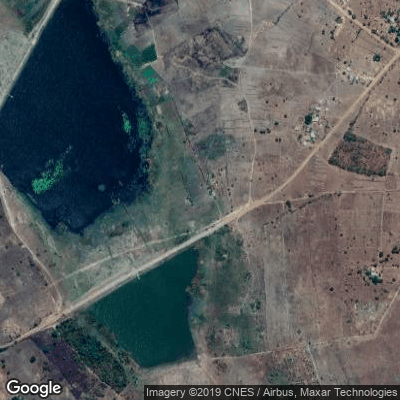

In [4]:
choice = 'water_1.png'
image_dir = f'images/{folder}/{choice}'
image = Image.open(image_dir).convert('RGB')
image

In [5]:
proc_image = preprocess_image(image)
target_class = folder - 1

# prediction by model
print('prediction:', model(proc_image))
print('target:', target_class)

prediction: tensor([[ 2.1296,  2.3569, -3.8840]], grad_fn=<AddmmBackward>)
target: 0


In [6]:
GBP = GuidedBackprop(model)
guided_grads = GBP.generate_gradients(proc_image, target_class)
grayscale_guided_grads = convert_to_grayscale(guided_grads)

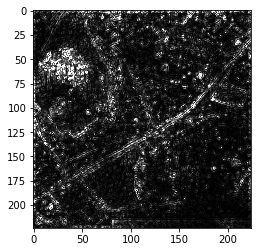

In [7]:
plt.imshow(np.squeeze(grayscale_guided_grads.transpose(1, 2, 0)), cmap='gray', vmin=0, vmax=1)